In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Looking for null values and missing values in the data 

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age- in years

sex-(1 = male; 0 = female)

cp- chest pain type

trestbps- resting blood pressure (in mm Hg on admission to the hospital)

chol- serum cholestoral in mg/dl

fbs-(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg-resting electrocardiographic results

thalach-maximum heart rate achieved

exang-exercise induced angina (1 = yes; 0 = no)

oldpeak-ST depression induced by exercise relative to rest

slope-the slope of the peak exercise ST segment

ca-number of major vessels (0-3) colored by flourosopy

thal- 3 = normal; 6 = fixed defect; 7 = reversable defect

target- 1 or 0

In [6]:
data=shuffle(data)

In [7]:
data.shape

(303, 14)

Size of the data set (303) rows and 13 features with 1 target column

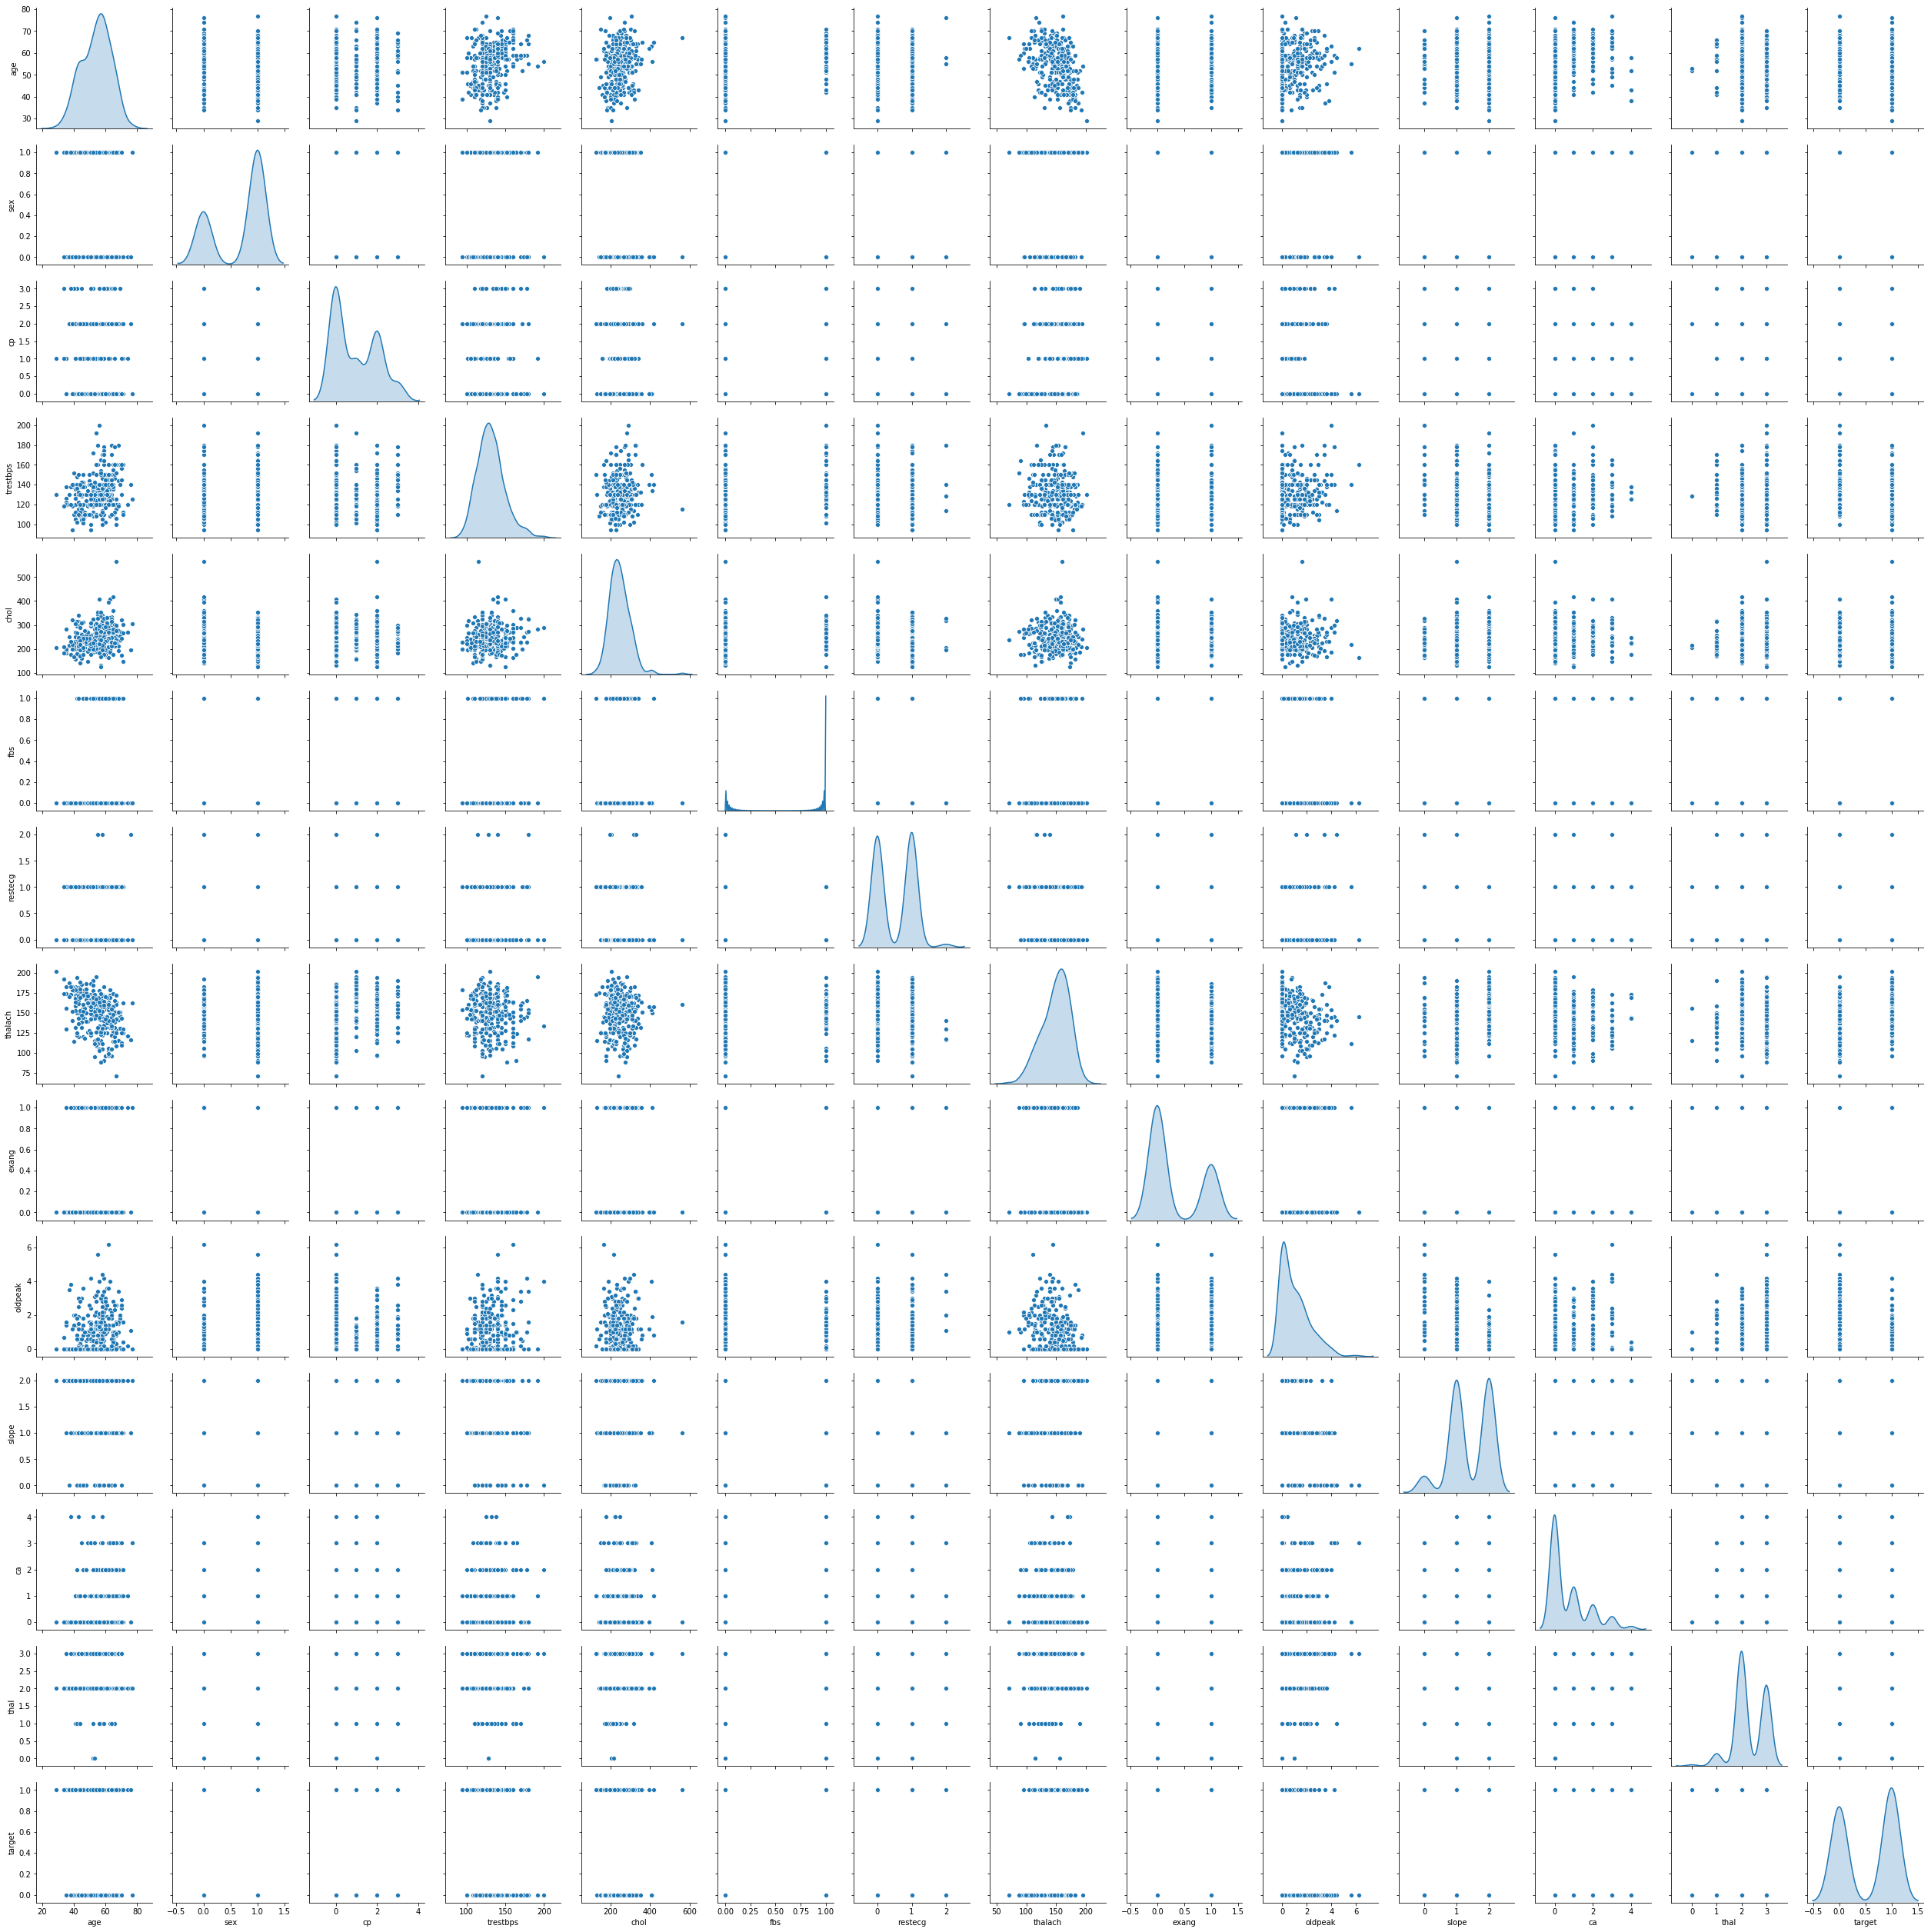

In [8]:
sns.pairplot(data, diag_kind="kde")

# Visulaisation of realtions between variables 

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

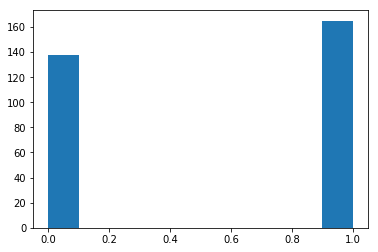

In [9]:
plt.hist(data.target)

we can observe that the data is balanced as both the classes are almost equal 

Text(0, 0.5, 'Frequency of disease')

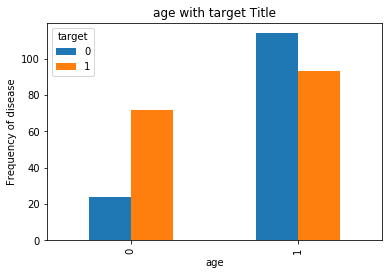

In [10]:
pd.crosstab(data.sex,data.target).plot(kind='bar')
plt.title('age with target Title')
plt.xlabel('age')
plt.ylabel('Frequency of disease')

The males (1) have less individulas with heart disease( target =1) and females(0) have more with disease(target=1) than with no disease

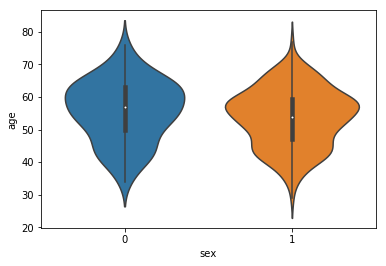

In [11]:
sns.violinplot(y="age", x="sex", data=data)

we can observe that the dataset have males and females both having similar age distribution with mean around 60 and spread from 25 to 85

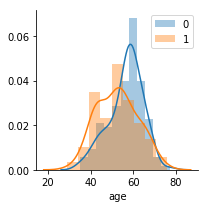

In [12]:
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "age")
plt.legend()

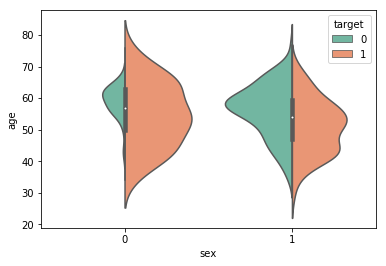

In [13]:
ax = sns.violinplot(x="sex", y="age", hue="target",data=data, palette="Set2", split=True,scale="count")

the plot shows the distribution of heart disease in age group and gender, we can see that the (females(0)) have lower fraction of females with no heart disease in age range 50 to 70 , while males have more widely distributed non disease population too

Text(0, 0.5, 'Frequency of disease')

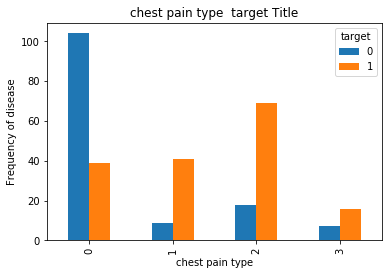

In [14]:
pd.crosstab(data.cp,data.target).plot(kind='bar')
plt.title('chest pain type  target Title')
plt.xlabel('chest pain type')
plt.ylabel('Frequency of disease')

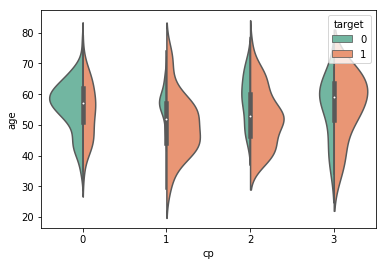

In [15]:
ax = sns.violinplot(x="cp", y="age", hue="target",data=data, palette="Set2", split=True,scale="count")

Chest pain types and the distribution with age, we can observe that the chest pain type 0 have least number of heart disease subjects, while chest pain type 1, and 4 have large fration of people with target =1(heart disease)

The chest pain category is definately affecting the probablity of having the heart disease as it varies with different types.

In [16]:
pd.crosstab(data["cp"],data["target"],margins=True)

target,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


27 % with type 0

82 % with type 1

79 % with type 2

69 % with type 3 

chest pain types and the percentage of people having the heart disease 

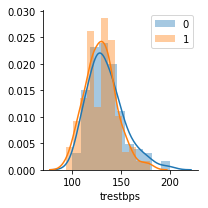

In [17]:
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "trestbps")
plt.legend()

The distribution of resting blood presure can not diffrentiate alone , but the people with blood presure in range 110-130 
the people with disease are more than the one with no disease(0)

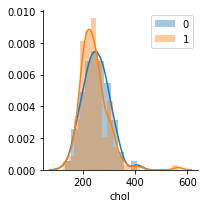

In [18]:
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "chol")
plt.legend()

Cholestrol also alone can not show the significant impact with the target , we have to analyse the feature with respet to other features, also there are some outliers which definately affect the target which can be seen in the plot 

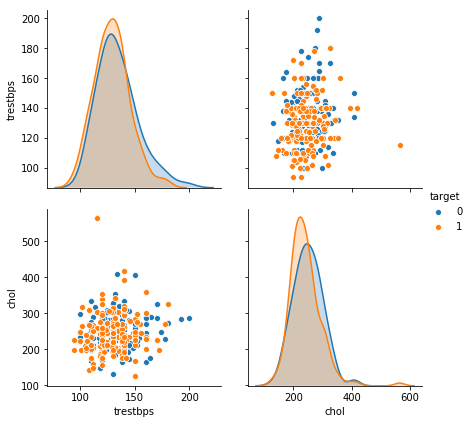

In [19]:
g = sns.pairplot(data, height=3,vars=["trestbps", "chol"] , hue="target")

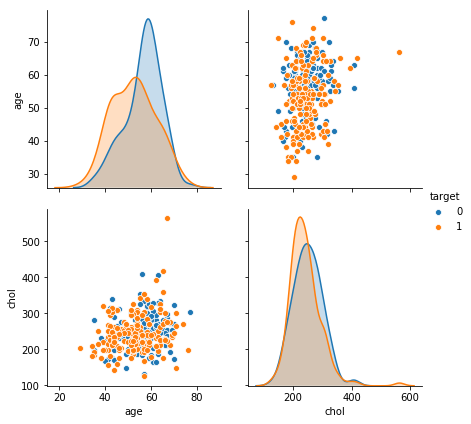

In [20]:
g = sns.pairplot(data, height=3,vars=["age", "chol"] , hue="target")

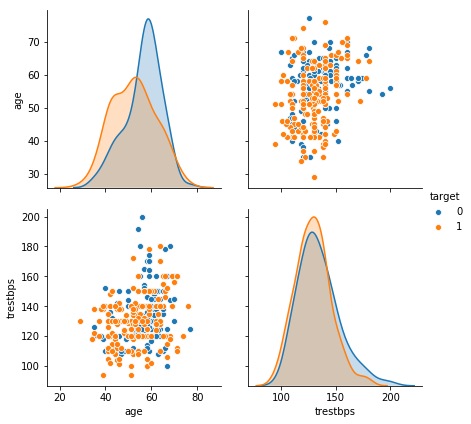

In [21]:
g = sns.pairplot(data, height=3,vars=["age", "trestbps"] , hue="target")

Text(0, 0.5, 'Frequency of disease')

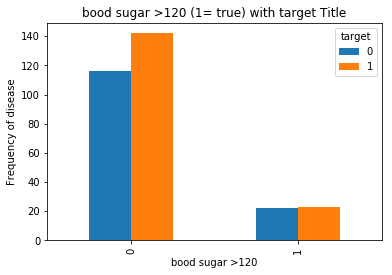

In [22]:
pd.crosstab(data.fbs,data.target).plot(kind='bar')
plt.title('bood sugar >120 (1= true) with target Title')
plt.xlabel('bood sugar >120')
plt.ylabel('Frequency of disease')

Blood sugar shows less impact on heart disease as we can observe that even low blood sugar people have heart disease and for high blood sugar also the fration of having disease and not having disease is similar

Text(0, 0.5, 'Frequency of disease')

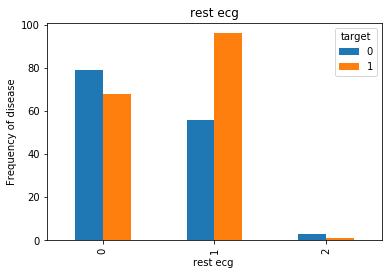

In [23]:
pd.crosstab(data.restecg,data.target).plot(kind='bar')
plt.title('rest ecg')
plt.xlabel('rest ecg ')
plt.ylabel('Frequency of disease')

In [24]:
pd.crosstab(data["restecg"],data["target"],margins=True)

target,0,1,All
restecg,,,
0,79,68,147
1,56,96,152
2,3,1,4
All,138,165,303


The people with rest ecg value of 1 are having more chances of having the heart disease

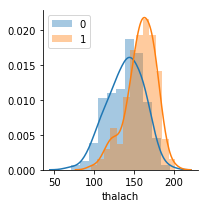

In [25]:
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "thalach")
plt.legend()

max heart rate achived and the affect on the cances of heart disease

Text(0, 0.5, 'Frequency of disease')

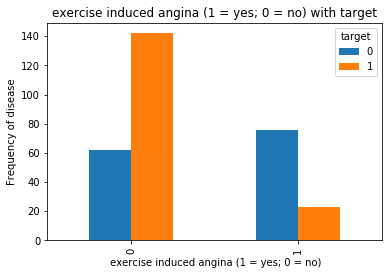

In [26]:
pd.crosstab(data.exang,data.target).plot(kind='bar')
plt.title('exercise induced angina (1 = yes; 0 = no) with target')
plt.xlabel(' exercise induced angina (1 = yes; 0 = no)')
plt.ylabel('Frequency of disease')

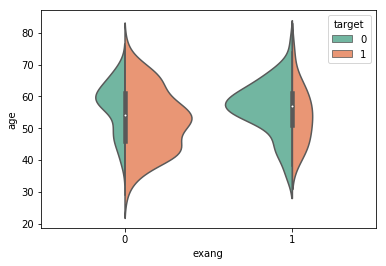

In [27]:
ax = sns.violinplot(x="exang", y="age", hue="target",data=data, palette="Set2", split=True,scale="count")

when the exercise induced angina is there then the chances of disease are less as compared to when it is not there and it also changes with the age of the person

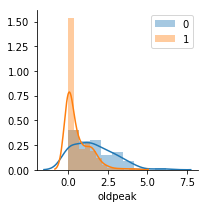

In [28]:
g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "oldpeak")
plt.legend()

we can observe that the oldpeak value of '0' affects the target as value =0 have large number of people with target =1

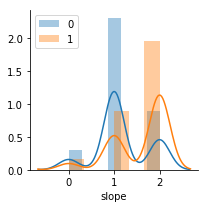

In [29]:

g = sns.FacetGrid(data, hue="target")
g = g.map(sns.distplot, "slope")
plt.legend()

the the slope of the peak exercise ST segment affects the target as value 2 is causing more target 1 and value 1 is causing more target 0

Text(0, 0.5, 'Frequency of disease')

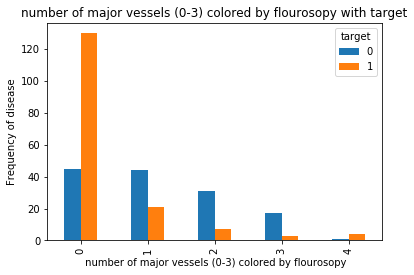

In [30]:

pd.crosstab(data.ca,data.target).plot(kind='bar')
plt.title('number of major vessels (0-3) colored by flourosopy with target')
plt.xlabel(' number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Frequency of disease')

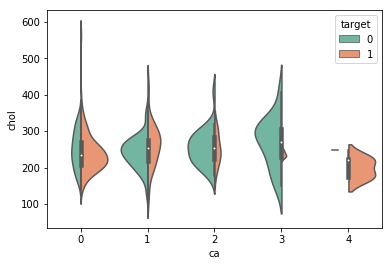

In [31]:
ax = sns.violinplot(x="ca", y="chol", hue="target",data=data, palette="Set2", split=True,scale="count")

the major vessles coloration affects the target which can be seen for value 0 and 4 where if 4 or 0 coloration the person have more chances of having the diseases

we can also observe thevariation with the cholestrol level as even the cholestrol level is low but the coloration shows the blocakge which certainly affects the heart disease , 

people with all 4 coloration even at low colestrol have high chances of heart disease 

Text(0, 0.5, 'Frequency of disease')

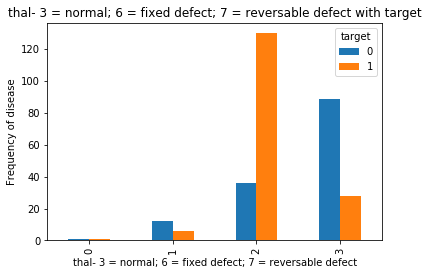

In [32]:
pd.crosstab(data.thal,data.target).plot(kind='bar')
plt.title('thal- 3 = normal; 6 = fixed defect; 7 = reversable defect with target')
plt.xlabel('thal- 3 = normal; 6 = fixed defect; 7 = reversable defect')
plt.ylabel('Frequency of disease')

# checking for outliers in the features 

In [33]:
num_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

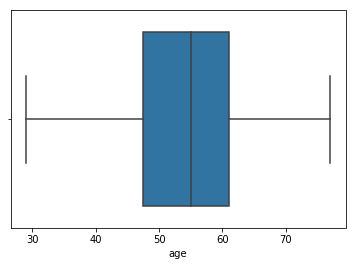

In [34]:
sns.boxplot(data.age)


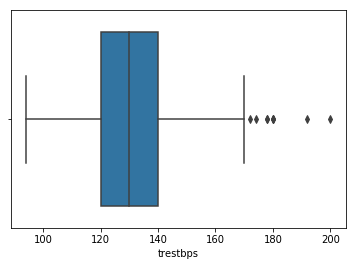

In [35]:
sns.boxplot(data.trestbps)

we can observe some outliers in the resting blood pressure (in mm Hg on admission to the hospital)

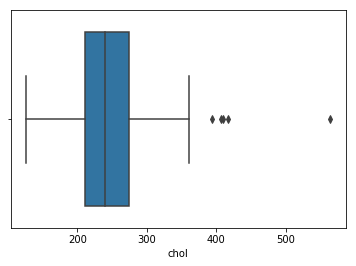

In [36]:
sns.boxplot(data.chol)

we can observe some outliers in the cholestrol level 

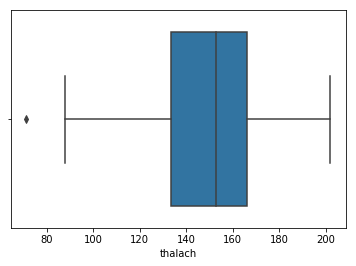

In [37]:
sns.boxplot(data.thalach)


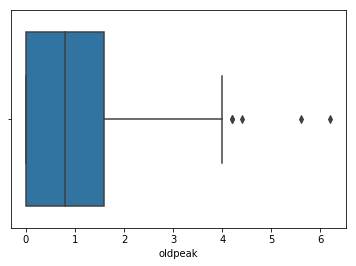

In [38]:
sns.boxplot(data.oldpeak)


In [39]:
data.loc[data['trestbps'] > 170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [40]:
data.loc[data['chol'] > 350]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [41]:
data.loc[data['thalach'] <80]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [42]:
data.loc[data['oldpeak'] >4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0


we can obsere that we can drop the outliers of "oldpeak" and "thalach" as they are having majority as 0 

In [43]:
data_new=data.copy()


Removing the outliers of old peak

In [44]:
data_new = data_new.drop(data_new[data_new.oldpeak > 4].index)

Removing outliers of thalach

In [45]:
data_new = data_new.drop(data_new[data_new.thalach < 80].index)

In [46]:
data.shape

(303, 14)

In [47]:
data_new.shape

(297, 14)

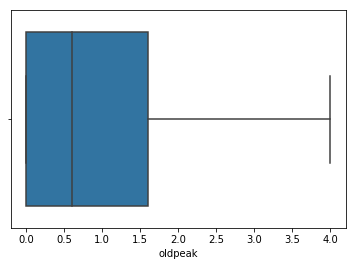

In [48]:
sns.boxplot(data_new.oldpeak)


data new without oldpeak outliers

In [49]:
ohgender = pd.get_dummies(data_new['sex'], prefix = 'category_gender')
ohcp = pd.get_dummies(data_new['cp'], prefix = 'category_cp')
ohfbs = pd.get_dummies(data_new['fbs'], prefix = 'category_fbs')
ohrestecg = pd.get_dummies(data_new['restecg'], prefix = 'category_restecg')
ohexang = pd.get_dummies(data_new['exang'], prefix = 'category_exang')
ohslope = pd.get_dummies(data_new['slope'], prefix = 'category_slope')
ohca = pd.get_dummies(data_new['ca'], prefix = 'category_ca')
ohthal = pd.get_dummies(data_new['thal'], prefix = 'category_thal')


In [50]:
data_new_oh = pd.concat([data_new, ohgender,ohcp,ohfbs,ohrestecg,ohexang,ohslope,ohca,ohthal], axis=1)

In [51]:
data_new_oh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,category_slope_2,category_ca_0,category_ca_1,category_ca_2,category_ca_3,category_ca_4,category_thal_0,category_thal_1,category_thal_2,category_thal_3
179,57,1,0,150,276,0,0,112,1,0.6,...,0,0,1,0,0,0,0,1,0,0
14,58,0,3,150,283,1,0,162,0,1.0,...,1,1,0,0,0,0,0,0,1,0
246,56,0,0,134,409,0,0,150,1,1.9,...,0,0,0,1,0,0,0,0,0,1
104,50,1,2,129,196,0,1,163,0,0.0,...,1,1,0,0,0,0,0,0,1,0
207,60,0,0,150,258,0,0,157,0,2.6,...,0,0,0,1,0,0,0,0,0,1


In [52]:

data_new_oh.drop(['age','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1,inplace=True)

In [53]:
data_new_oh.head()

,trestbps,chol,thalach,oldpeak,target,category_gender_0,category_gender_1,category_cp_0,category_cp_1,category_cp_2,...,category_slope_2,category_ca_0,category_ca_1,category_ca_2,category_ca_3,category_ca_4,category_thal_0,category_thal_1,category_thal_2,category_thal_3
179,150,276,112,0.6,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
14,150,283,162,1.0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
246,134,409,150,1.9,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
104,129,196,163,0.0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
207,150,258,157,2.6,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [54]:
data_new_oh.columns

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'category_gender_0',
       'category_gender_1', 'category_cp_0', 'category_cp_1', 'category_cp_2',
       'category_cp_3', 'category_fbs_0', 'category_fbs_1',
       'category_restecg_0', 'category_restecg_1', 'category_restecg_2',
       'category_exang_0', 'category_exang_1', 'category_slope_0',
       'category_slope_1', 'category_slope_2', 'category_ca_0',
       'category_ca_1', 'category_ca_2', 'category_ca_3', 'category_ca_4',
       'category_thal_0', 'category_thal_1', 'category_thal_2',
       'category_thal_3'],
      dtype='object')

In [55]:
data_new_oh.shape

(297, 30)

# Feature selection 

In [82]:
Y_oh=data_new_oh['target']
X_oh=data_new_oh[['trestbps', 'chol', 'thalach', 'oldpeak', 'category_gender_0',
       'category_gender_1', 'category_cp_0', 'category_cp_1', 'category_cp_2',
       'category_cp_3', 'category_fbs_0', 'category_fbs_1',
       'category_restecg_0', 'category_restecg_1', 'category_restecg_2',
       'category_exang_0', 'category_exang_1', 'category_slope_0',
       'category_slope_1', 'category_slope_2', 'category_ca_0',
       'category_ca_1', 'category_ca_2', 'category_ca_3', 'category_ca_4',
       'category_thal_0', 'category_thal_1', 'category_thal_2',
       'category_thal_3']]


In [83]:
X_oh.head()

,trestbps,chol,thalach,oldpeak,category_gender_0,category_gender_1,category_cp_0,category_cp_1,category_cp_2,category_cp_3,...,category_slope_2,category_ca_0,category_ca_1,category_ca_2,category_ca_3,category_ca_4,category_thal_0,category_thal_1,category_thal_2,category_thal_3
179,150,276,112,0.6,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14,150,283,162,1.0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
246,134,409,150,1.9,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
104,129,196,163,0.0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
207,150,258,157,2.6,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
def feature_Selection_for_classification(X,Y):
    from xgboost import XGBClassifier
    from xgboost import plot_importance
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from sklearn.metrics import accuracy_score

    # splitting data in test train 
    X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=.33)
    
    # creating model 
    model = XGBClassifier()
    
    # fitting model 
    model.fit(X_train,y_train)
     
    #plot feature importance
    plot_importance(model)
    plt.show()

    acc=[]
    #selecting features based on model 
    thresholds = sorted(model.feature_importances_)
    print("thresholds ##",thresholds)
    sorted_idx = np.argsort(model.feature_importances_)[::-1]
    for index in sorted_idx:
        print(" the features and thier importance :",[X_train.columns[index], model.feature_importances_[index]]) 
    
    for thresh in thresholds:
       # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        
        # train model
        print(select_X_train.shape)
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)
       
        # eval model
        select_X_test = selection.transform(X_test)
        print("shape of selection test",select_X_test.shape)
        y_pred = selection_model.predict(select_X_test)
       
        #predictions = [round(value) for value in y_pred]
        
        accuracy=accuracy_score(y_test,y_pred)
        acc.append(accuracy)
        print("Thresh=",thresh, " and accuracy is :", accuracy)
    plt.plot(thresholds,acc)
    

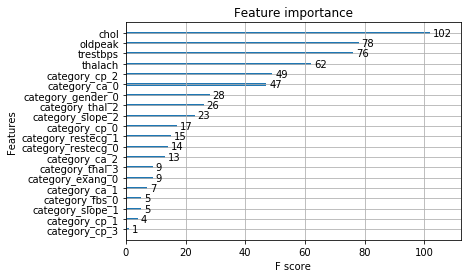

thresholds ## [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016949152, 0.006779661, 0.008474576, 0.008474576, 0.011864407, 0.015254238, 0.015254238, 0.022033898, 0.023728814, 0.025423728, 0.02881356, 0.03898305, 0.044067796, 0.047457628, 0.07966102, 0.08305085, 0.10508475, 0.12881356, 0.13220339, 0.17288135]
 the features and thier importance : ['chol', 0.17288135]
 the features and thier importance : ['oldpeak', 0.13220339]
 the features and thier importance : ['trestbps', 0.12881356]
 the features and thier importance : ['thalach', 0.10508475]
 the features and thier importance : ['category_cp_2', 0.08305085]
 the features and thier importance : ['category_ca_0', 0.07966102]
 the features and thier importance : ['category_gender_0', 0.047457628]
 the features and thier importance : ['category_thal_2', 0.044067796]
 the features and thier importance : ['category_slope_2', 0.03898305]
 the features and thier importance : ['category_cp_0', 0.02881356]
 the features and thier importan

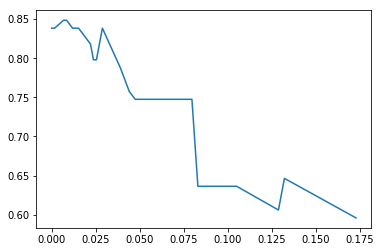

In [85]:
feature_Selection_for_classification(X_oh,Y_oh)

Similar kind of results for feature selection even with scaling the data

In [86]:
xgb_selected=['oldpeak','chol','thalach','trestbps','category_ca_0','category_gender_0','category_exang_0','category_slope_2','category_thal_3','category_cp_2','category_exang_0','category_gender_0','category_cp_0','category_slope_1']

In [87]:
x_xgb_selected_oh=X_oh[xgb_selected]

In [88]:
scaler = StandardScaler()
# Fit on the training data
scaler.fit(x_xgb_selected_oh)
scaled_X_xgb_oh = scaler.fit_transform(x_xgb_selected_oh)

In [89]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('RF', RandomForestClassifier()))

In [91]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('RF', RandomForestClassifier()))

In [92]:
X_train_xgb_oh, X_test_xgb_oh, y_train_xgb_oh, y_test_xgb_oh = train_test_split(scaled_X_xgb_oh,Y_oh, test_size=0.33, random_state=33)
accuracies=[]
names=[]
for name, model in models:
    model.fit(X_train_xgb_oh,y_train_xgb_oh)
    y_pred=model.predict(X_test_xgb_oh)
    names.append(name)
    accuracy=(accuracy_score(y_test_xgb_oh, y_pred))
    accuracies.append(accuracy)
    print(name,accuracy)

LR 0.8787878787878788
KNN 0.8484848484848485
CART 0.7474747474747475
NB 0.8484848484848485
XGB 0.8383838383838383
LGBM 0.8181818181818182
RF 0.8282828282828283


we can observe the the logistic regresssion is giving the accuracy of 83% which is max among the models 

In [93]:
Lr=LogisticRegression()
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(scaled_X_xgb_oh,Y_oh, test_size=0.3, random_state=33)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efdea2f4a8>)

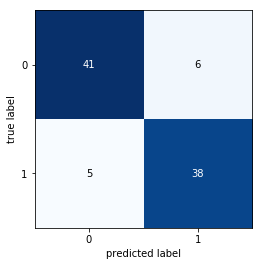

In [94]:
Lr.fit(X_train_oh,y_train_oh)
pred_lr_oh=Lr.predict(X_test_oh)
plot_confusion_matrix(confusion_matrix(y_test_oh, pred_lr_oh))